In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad

In [2]:
def transform(x):
    return x-1

In [3]:
def f(x):
    return np.sqrt(x)

In [4]:
def w(x):
    return (1-transform(x)**2)**(-1/2)

In [5]:
def T(k,x):
    return np.cos(k*np.arccos(transform(x)))

In [6]:
def phi(k):
    return np.pi if k==0 else np.pi/2

In [7]:
def c(k):
    c, _ = quad(lambda x: T(k,x)*f(x)*w(x), 0, 2)
    c=c/phi(k)
    return c

In [8]:
def p(m):
    cs = []
    for i in range(m+1):
        cs.append(c(i))
    return np.polynomial.Chebyshev(cs,domain=(0,2))

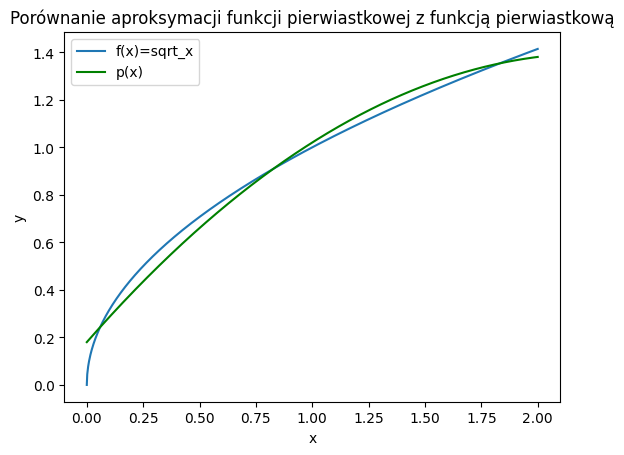

In [9]:
x = np.linspace(0,2,1000)
y = np.sqrt(x)

y_hat = p(2)(x)

plt.plot(x,y, label="f(x)=sqrt_x")
plt.plot(x,y_hat, label="p(x)", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie aproksymacji funkcji pierwiastkowej z funkcją pierwiastkową")
plt.legend()
plt.show()

In [10]:
def L2(x):
    return (np.sqrt(x) - p(2)(x))**2

In [11]:
errors = []
for a in x:
    error = quad(L2, a, a+1e-9)
    errors.append(error)

In [12]:
max_index = np.argmax(errors)
min_index = np.argmin(errors)
max_argument = x[max_index]
min_argument = x[min_index]
max_error = errors[max_index][0]
min_error = errors[min_index][0]
max_argument_weight = w(max_argument+1)
min_argument_weight = w(min_argument+1)
print(f"Max error: {max_error}")
print(f"Max error weight: {max_argument_weight}")
print(f"Max error argument: {max_argument}")
print(f"Min error: {min_error}")
print(f"Min error weight: {min_argument_weight}")
print(f"Min error argument: {min_argument}")


Max error: 3.2415187271860065e-11
Max error weight: 1.0
Max error argument: 0.0
Min error: 5.740246191984689e-13
Min error weight: nan
Min error argument: 1.6556556556556556


/var/folders/d7/k8_8krks3wv0gg54bf0crtvm0000gn/T/ipykernel_6379/2286747628.py:2: RuntimeWarning: invalid value encountered in scalar power
  return (1-transform(x)**2)**(-1/2)


In [13]:
relative_error = np.abs(y - y_hat) / np.where(y != 0, y, np.finfo(float).tiny)
max_index = np.argmax(relative_error)
max_argument = x[max_index]
max_value = relative_error[max_index]
max_argument_weight = w(max_argument+1)
max_value
max_argument

0.0

In [15]:
error_l2 = quad(L2, 0, 2)
error_l2[0]

0.002697050979671388